<a href="https://colab.research.google.com/github/shirkepranav98/Play-Store-App-Review-Analysis-/blob/main/Pranav_Shirke_Play_Store_App_Review_Analysis_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## Which free app is having highest installs and most number of reviews with rating greater than 4?

# Mounting the Drive and Loading the csv files





In [38]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# Import pandas 
import pandas as pd
import numpy as np
import seaborn as sns

In [99]:
# Loading two csv files as path1 and path2
path1 = '/content/drive/MyDrive/AlmaBetter/Project on play store/csv files/'
path2 = '/content/drive/MyDrive/AlmaBetter/Project on play store/csv files/'

In [100]:
play_s_df = pd.read_csv(path1 + 'Play Store Data.csv')
user_r_df = pd.read_csv(path2 + 'User Reviews.csv')

# 1. INTRODUCTION TO DATA
---
Firstly let's get to know data. While I was analyzing the data, I used Pandas library.

1. info(): It informs about data columns and data types.
2. head(): It returns the first five data.
3. tail(): It returns the last five data.
4. columns : It returns data columns
5. describe : To get some basic statistical details
5. shape : It gives number of rows and columns in a tuble.

In [42]:
play_s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [43]:
play_s_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [44]:
play_s_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [45]:
play_s_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [46]:
play_s_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [101]:
play_s_df.shape

(10841, 13)

In [105]:
duplicate =play_s_df.groupby(['App']).agg({'Category': 'count'}).reset_index()
duplicate = duplicate.sort_values(by=['Category'], ascending=False)
duplicate.head()

,App,Category
7302,ROBLOX,9
1934,"CBS Sports App - Scores, News, Stats & Watch Live",8
2364,Candy Crush Saga,7
3504,Duolingo: Learn Languages Free,7
101,8 Ball Pool,7


In [ ]:
# before = len(play_s_df.index)
# print('Total entries with duplicates were '+ (str(before)))
# play_s_df.drop_duplicates(subset ="App",keep = 'first', inplace = True) #Drop duplicates with a value in a specific column.
# after = len(play_s_df.index)
# print('Total entries after duplicates were dropped are '+ (str(after)))
# print('Total '+ (str(before-after))+' entries were dropped.')

# Cleaning of Data
---



In [48]:
# Changing the column names to one word
play_s_df.rename(columns={'Last Updated':'Last_Updated', 'Content Rating':'Content_Rating', 'Current Ver':'Current_Version', 'Android Ver':'Android_Version'}, inplace = True)

#**Column:Rating**

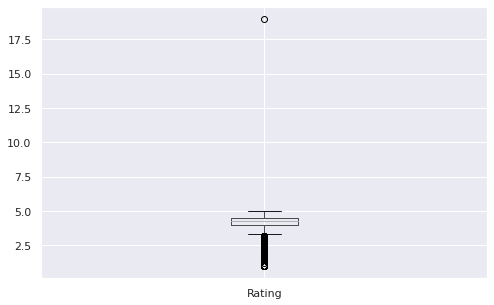

In [49]:
play_s_df.boxplot(column='Rating');

In [50]:
# Finding the sum of null values for each dataseries throughout the Dataframe
play_s_df.isnull().sum()

App                   0
Category              0
Rating             1474
Reviews               0
Size                  0
Installs              0
Type                  1
Price                 0
Content_Rating        1
Genres                0
Last_Updated          0
Current_Version       8
Android_Version       3
dtype: int64

In [51]:
# Checking the outliers 
play_s_df[play_s_df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [52]:
# Removing the outliers from column because it increases variability in our data.
play_s_df.drop([10472],inplace=True)

In [53]:
# Checking the dropped outliers with method of slicing
play_s_df[10471:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


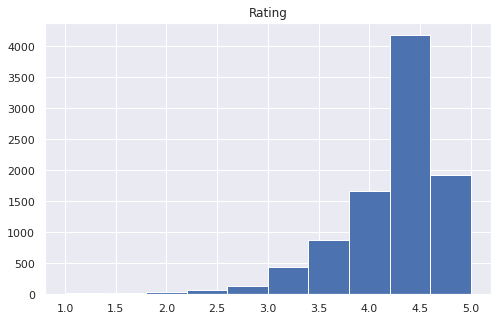

In [54]:
play_s_df.hist(column='Rating');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


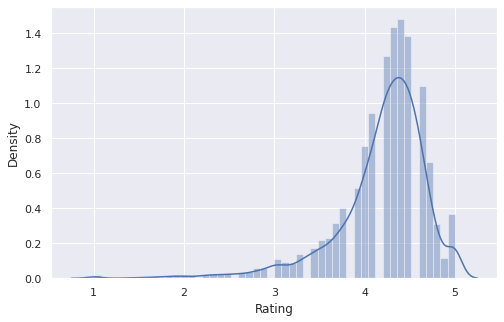

In [55]:
sns.set(rc={'figure.figsize':(8,5)});
sns.distplot(play_s_df.Rating);

In [56]:
''' Filling null values with median value because as we can see from the above distplot appeared as skewed to left. 
So the median is usually preferred in measures of central tendency when your data set is skewed '''

play_s_df['Rating'] = play_s_df['Rating'].fillna(play_s_df['Rating'].median())

In [57]:
# Counting the number of null values in Rating column
play_s_df.Rating.isnull().sum()

0

#**Column:Last_Updated**

In [58]:
# Converting datetime format for Last_Updated column
# Importing datetime modules
from datetime import datetime
from datetime import date

In [59]:
play_s_df['Last_Updated'] = pd.to_datetime(play_s_df['Last_Updated'],errors='coerce')

#**Column:Reviews**

In [60]:
#Checking null values
play_s_df.Reviews.isnull().sum()

0

In [61]:
# Converting the datatype of Reviews into numeric datatype
play_s_df['Reviews'] = pd.to_numeric(play_s_df['Reviews'])

In [62]:
# Checking the changed datatype of Reviews
play_s_df.Reviews.dtype

dtype('int64')

#**Column:Type**

In [63]:
# Checking the null values in Type Column
play_s_df['Type'].isnull().sum()

1

In [64]:
# Display the row which have null values in Type Column. Apart from Free and Paid Type, this column also has 1 NaN, which is display below:
play_s_df[play_s_df.Type.isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device


### Observation from above gives us that the only row with 0 Install and 0 Reviews, and also descript us that something wrong with this record. So, we opted to remove the row. 

In [65]:
# Removing the row from the data because there might be something wrong with this record and also it has undisturbed data in the row
play_s_df.drop([9148],inplace=True)

In [66]:
# Observing the dropped row with slicing
play_s_df[9145:9150]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
9145,EA SPORTS™ FIFA 18 Companion,SPORTS,3.9,282727,63M,"10,000,000+",Free,0,Everyone,Sports,2017-12-07,18.0.5.172734,4.4 and up
9146,The Simpsons™: Tapped Out,FAMILY,4.3,636995,49M,"10,000,000+",Free,0,Teen,Casual,2018-07-31,4.34.0,4.0.3 and up
9147,Plants vs. Zombies™ 2,FAMILY,4.4,567632,15M,"10,000,000+",Free,0,Everyone 10+,Casual,2018-06-12,6.8.1,4.1 and up
9149,Star Wars™: Galaxy of Heroes,FAMILY,4.5,1461698,67M,"10,000,000+",Free,0,Everyone 10+,Role Playing,2018-05-21,0.12.334385,4.1 and up
9150,Dungeon Keeper,FAMILY,4.0,69574,45M,"500,000+",Free,0,Everyone 10+,Strategy,2018-05-24,1.8.91,4.1 and up


In [67]:
# Checking the null values in Type Column
play_s_df.Type.isnull().sum()

0

#**Column: Size**

In [68]:
# Examining the Unique values
play_s_df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

### Amidst all the apps in this dataset, none has its size reach 1GB. All the values we have to parse either end with ‘M’ (Megabyte) or ‘k’ (kilobyte). So here we parsed the values in only MB(megabyte) as it is better way of representing the size in a dataset

In [69]:
# Expressly Transforming the Variable Size value into proper float value
play_s_df['Size'] = play_s_df.Size.apply(lambda x: str(x).replace("Varies with device",'NaN') if "Varies with device" in str(x) else x)
play_s_df['Size'] = play_s_df.Size.apply(lambda x: str(x).replace("M","") if "M" in str(x) else x)
play_s_df['Size'] = play_s_df.Size.apply(lambda x: float(str(x).replace("k",""))/1024 if "k" in str(x) else x)
play_s_df['Size'] = play_s_df['Size'].astype(float)
play_s_df['Size'].dtype

dtype('float64')

#**Column: Installs**

In [70]:
# Checking unique values in Column
play_s_df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

### Data type of Installs is object. We make similar procedures, which constructed in the 'Size'.

In [71]:
# Now Transforming number of Installs into proper integer number 
play_s_df['Installs'] = play_s_df.Installs.apply(lambda x: str(x).replace("+","") if "+" in str(x) else x)
play_s_df['Installs'] = play_s_df.Installs.apply(lambda x: str(x).replace(",","") if "," in str(x) else x)
play_s_df['Installs'] = play_s_df.Installs.astype(int)
play_s_df['Installs'].dtype

dtype('int64')

# **Column: Price**

In [72]:
# Observing the unique values in Column
play_s_df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

### As we look out for unique values that will be like this lead: ‘0’ if it is free, else a '$' sign followed by a floating-point number. Datatype of Price is object. We can make similar code as in Installs to get appropriate dtype. 

In [73]:
play_s_df['Price'] = play_s_df['Price'].apply(lambda x: str(x).replace("$","") if "$" in str(x) else x)
play_s_df['Price'] = play_s_df['Price'].astype(float)
play_s_df['Price'].dtype

dtype('float64')

# **Column: Current_Version**

In [74]:
# Observing the null values in Current_Version Column
play_s_df.Current_Version.isnull().sum()

8

In [75]:
# Displaying NaN values which we have to fill with mode of Current_Version
play_s_df[play_s_df.Current_Version.isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.700000,5000,Free,0.00,Everyone,Art & Design,2018-06-06,NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,0.010742,1000000,Free,0.00,Everyone,Libraries & Demo,2013-02-12,NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.700000,500000,Free,0.00,Everyone,Tools,2017-05-10,NaN,4.0 and up
6803,BT Master,FAMILY,4.3,0,0.216797,100,Free,0.00,Everyone,Education,2016-11-06,NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14.000000,50000,Paid,0.99,Everyone,Puzzle,2018-04-18,NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.3,44,7.200000,10000,Free,0.00,Everyone,Entertainment,2017-04-03,NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.3,1,0.231445,10,Paid,0.99,Everyone,Tools,2016-07-04,NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8,0.642578,1000,Free,0.00,Everyone,Books & Reference,2017-01-31,NaN,3.0 and up


In [83]:
# # Filling NaN values with mode of Current_Version
play_s_df['Current_Version'].fillna(str(play_s_df['Current_Version'].mode().values[0]), inplace=True)

# **Column: Android_Version**

In [85]:
# Observing the null values in Android_Version Column
play_s_df.Android_Version.isnull().sum()

2

In [86]:
# Displaying NaN values which we have to fill with mode of Current_Version
play_s_df[play_s_df.Android_Version.isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11.0,1000,Paid,1.49,Everyone,Personalization,2018-07-20,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1,10000,Free,0.00,Everyone,Personalization,2018-03-27,1.1,NaN


In [91]:
play_s_df['Android_Version'] = play_s_df['Android_Version'].replace({' and up':''}, regex=True)

In [87]:
# # Filling NaN values with mode of Android_Version
play_s_df['Android_Version'].fillna(str(play_s_df['Android_Version'].mode().values[0]), inplace=True)


In [78]:
play_s_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   App              10839 non-null  object        
 1   Category         10839 non-null  object        
 2   Rating           10839 non-null  float64       
 3   Reviews          10839 non-null  int64         
 4   Size             9145 non-null   float64       
 5   Installs         10839 non-null  int64         
 6   Type             10839 non-null  object        
 7   Price            10839 non-null  float64       
 8   Content_Rating   10839 non-null  object        
 9   Genres           10839 non-null  object        
 10  Last_Updated     10839 non-null  datetime64[ns]
 11  Current_Version  10831 non-null  object        
 12  Android_Version  10837 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.2+ MB


In [80]:
play_s_df.Category[0]


'ART_AND_DESIGN'

In [81]:
play_s_df.loc[play_s_df.Content_Rating=='Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
7312,Best CG Photography,FAMILY,4.3,1,2.5,500,Free,0.0,Unrated,Entertainment,2015-06-24,5.2,3.0 and up
8266,DC Universe Online Map,TOOLS,4.1,1186,6.4,50000,Free,0.0,Unrated,Tools,2012-02-27,1.3,2.3.3 and up
